In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")
%matplotlib inline

In [2]:
ds = pd.read_csv("survey.csv")
print(len(ds))
ds.head(5)

1259


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Description of Columns
state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee 
wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your 
employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervimsor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

### CLEANING

In [3]:
#Check type of data by columns
ds.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [4]:
#This checks values of each of the columns as preliminary overview of how dataset is structured

colnames = [col for col in ds.columns]
for col in colnames[:-1]:
    print(col, ds[col].unique())

Timestamp ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Fem

In [5]:
colnames = [col for col in ds.columns]
for col in colnames:
    ds[col].astype("str")

In [6]:
# Substitute NaN with non-sense ages, working age from 18 to 80. Remove - (mistakes)
ds["Age"] = ds['Age'].apply(lambda x: str(x).replace('-', '') if 18<int(x)<80 else None)
#check resulting number on NaNs and drop rows if not relevant:
print("Number nulls in Age:",(ds["Age"].isnull().sum()))

Number nulls in Age: 15


In [7]:
#drop rows
ds = ds[pd.notnull(ds['Age'])]
ds["Age"] = ds["Age"].astype("int")
print(len(ds))

1244



### WORK AND MENTAL ILLNESS

    

In [8]:
#Check for Nulls in work interfere". Drop rows if negligible amount or fill with NA if relevant
print("% Nulls work interfere on tot: ",(ds["work_interfere"].isnull().sum())/len(ds))
ds["work_interfere"].fillna("NA", inplace=True)

% Nulls work interfere on tot:  0.2090032154340836


#### DEFINE MENTAL ILLNESS STATE

In [9]:
#Add column to dataset to mark if employee has mental health issues or not, based on the description
#of the columns above. 
ds.loc[ds['treatment'] == "Yes", 'mental_ill'] = "Yes"
ds.loc[((ds["treatment"] == "No") & (ds["work_interfere"] != "NA")),"mental_ill"] = "Yes"
ds.loc[((ds["treatment"] == "No") & (ds["work_interfere"] == "NA")),"mental_ill"] = "No"
ds.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,mental_ill
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Yes
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,Yes
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Yes
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,Yes


In [10]:
#Filter dataset by to isolate employees with mental health issues
ment = ds[(ds["mental_ill"] == "Yes")]
non_ment = ds[(ds["mental_ill"] == "No")]

### MENATAL ILLNESS IN SURVEYED POPULATION

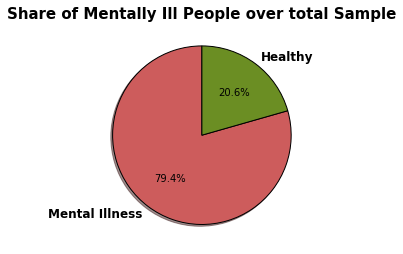

In [14]:
_,texts,autotexts = plt.pie([len(ment),len(non_ment)], colors=["indianred","olivedrab"],
        labels=["Mental Illness","Healthy"],autopct = '%1.1f%%',shadow=True, startangle=90)
for text in texts:
    text.set_size(12)
    text.set_fontweight("heavy")
plt.title("Share of Mentally Ill People over total Sample",
          fontweight='heavy', size=15)
plt.savefig("Share-Mental-Illness")

### HOW IS MENTAL ILLNESS RELATED WITH AGE OR WITH FAMILY HISTORY?

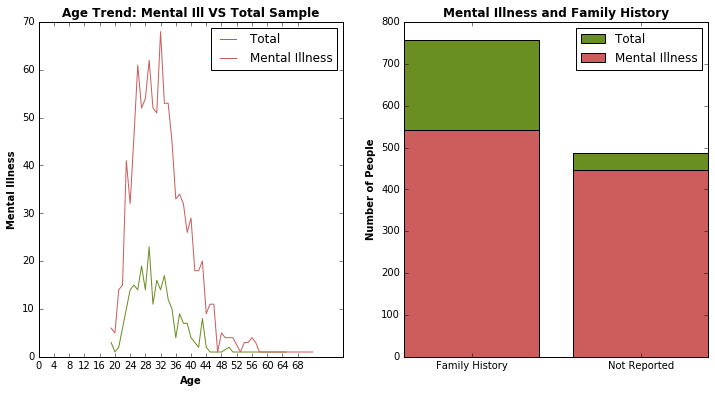

In [33]:
#calcualte the series of the age for both total and mentally ill
ds_age = ds.sort_values(by='Age').groupby(by='Age').count()['Timestamp']
ment_age = ment.sort_values(by='Age').groupby(by='Age').count()['Timestamp']

#count family history cases for both mental illness and not
family_ment = ment.groupby(by="family_history").count()['Timestamp']
family_tot = ds.groupby(by="family_history").count()['Timestamp']

fig, ax = plt.subplots(1,2, figsize=(12,6))
# Display Age distribution for an mental illness and non
ax[0].plot(ds_age, "olivedrab", label='Total')
ax[0].plot(ment_age,"indianred", label='Mental Illness')
ax[0].set_xticks(np.arange(0,70, step=4))

#ax[0].xlim(0,80)
ax[0].set_xlabel('Age',fontweight="heavy")
ax[0].set_ylabel('Mental Illness',fontweight="heavy")
ax[0].set_title("Age Trend: Mental Ill VS Total Sample",fontweight='heavy', size=12)
ax[0].legend()


#Display relationshiop between mental illness and reported family history
ax[1].bar(["Family History","Not Reported"],family_tot,color="olivedrab",
          label='Total')
ax[1].bar(["Family History","Not Reported"],family_ment,
          color="indianred",label='Mental Illness')

ax[1].set_ylabel('Number of People',fontweight="heavy")
ax[1].set_title("Mental Illness and Family History",fontweight='heavy', size=12)
ax[1].legend()

plt.savefig("Age-Family")

In [17]:
# Average Age of People VS Average Age of People with Mental Illness
avg_tot = ds["Age"].mean()
avg_ment = ment["Age"].mean()
print("TOT",avg_tot)
print("MENT",avg_ment)

TOT 32.155948553054664
MENT 32.392712550607285


In [18]:
#Relative share of people with reported and nor-reported family history who are
#affected by mental illness:
share_ment = [i for i in family_ment/family_tot]
print([i for i in zip(["Family History","Not Reported"],share_ment)])

[('Family History', 0.716931216931217), ('Not Reported', 0.9139344262295082)]


### HOW IS MENTAL ILLNESS RELATED WITH COMPANY SIZE AND REMOTE WORK?

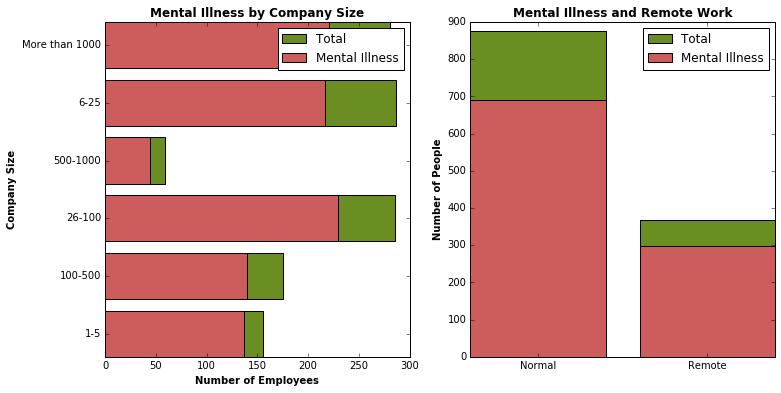

In [21]:
#Define frequency of mental illness over total for each company size
sizes = ['1-5','100-500','26-100','500-1000','6-25','More than 1000']
size_tot = ds.groupby(by="no_employees").count()["Timestamp"]
size_ment = ment.groupby(by="no_employees").count()["Timestamp"]


#Count mental illness cases among remote workers
rem_ment = ment.groupby(by="remote_work").count()['Timestamp']
rem_tot = ds.groupby(by="remote_work").count()['Timestamp']


fig, ax = plt.subplots(1,2, figsize=(12,6))

# Display Relative freq of mental illness by company size 
ax[0].barh(sizes,size_tot,color="olivedrab", label='Total')
ax[0].barh(sizes,size_ment,color="indianred", label='Mental Illness')

ax[0].set_xlabel('Number of Employees',fontweight="heavy")
ax[0].set_ylabel('Company Size',fontweight="heavy")
ax[0].set_title("Mental Illness by Company Size",fontweight='heavy', size=12)
ax[0].legend()


#Display relationshiop between mental illness and remote work
ax[1].bar(["Normal","Remote"],rem_tot,color="olivedrab",label='Total')
ax[1].bar(["Normal","Remote"],rem_ment,color="indianred",
          label='Mental Illness')

ax[1].set_ylabel('Number of People',fontweight="heavy")
ax[1].set_title("Mental Illness and Remote Work",fontweight='heavy', size=12)
ax[1].legend()

plt.savefig("Size-Remote")

In [22]:
#Relative share of employees affected by mental illness
share_ment = [i for i in size_ment/size_tot]
print([i for i in zip(sizes,share_ment)])

[('1-5', 0.8782051282051282), ('100-500', 0.8), ('26-100', 0.8006993006993007), ('500-1000', 0.7457627118644068), ('6-25', 0.7560975609756098), ('More than 1000', 0.7864768683274022)]


In [23]:
#Relative share of Normal and Remote workers affected by mental illness
share_ment = [i for i in rem_ment/rem_tot]
print([i for i in zip(["Normal","Remote"],share_ment)])

[('Normal', 0.7867730900798175), ('Remote', 0.8119891008174387)]


### IS MENTAL ILLNESS MORE PENALIZING IN TECH JOBS?

In [24]:
#filter for tech companies and compute frequancy of each ot the possibilities for work interfere
tech = ment.loc[ment["tech_company"] =="Yes"]
tech

#among tech companies, group by levels of work interference of mental illness:
t_ill = tech.groupby("work_interfere").agg({"tech_company": "count"})
t_ill = t_ill.reset_index()
t_ill.rename(columns={"tech_company":"count"}, inplace=True)
t_ill["rel_freq"] = t_ill["count"]/t_ill["count"].sum(axis=0)
t_ill

,work_interfere,count,rel_freq
0,NA,4,0.004944
1,Never,176,0.217553
2,Often,108,0.133498
3,Rarely,136,0.168109
4,Sometimes,385,0.475896


In [25]:
#filter for NON tech companies and compute frequency of each ot the possibilities for work interfere
ntech = ment.loc[ment["tech_company"] =="No"]
ntech.head()

#among tech companies, group by levels of work interference of mental illness:
nt_ill = ntech.groupby("work_interfere").agg({"tech_company": "count"})
nt_ill = nt_ill.reset_index() 
nt_ill.rename(columns={"tech_company":"count"}, inplace=True)
nt_ill["rel_freq"] = nt_ill["count"]/nt_ill["count"].sum(axis=0)
nt_ill

,work_interfere,count,rel_freq
0,Never,35,0.195531
1,Often,31,0.173184
2,Rarely,36,0.201117
3,Sometimes,77,0.430168


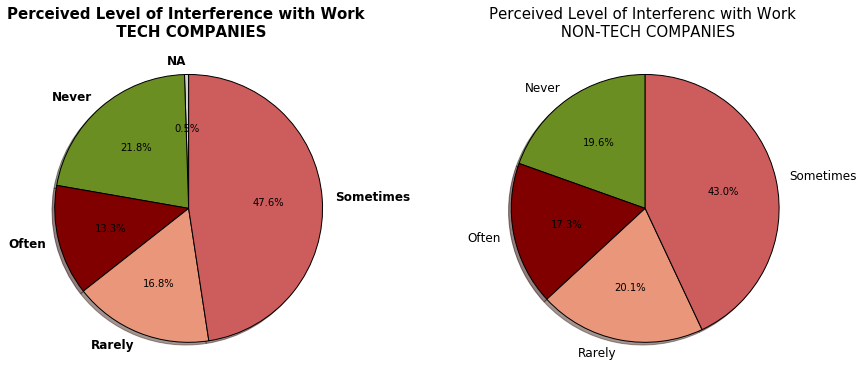

In [34]:
#Displays 2 pie charts to visually compare the relative frequencies of work_interfere.

interf_t = [i for i in t_ill["work_interfere"].unique()]
interf_nt = [i for i in nt_ill["work_interfere"].unique()]

fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.sca(ax[0])
col = ["lightgray","olivedrab","maroon","darksalmon","indianred"]
_,texts,autotexts = plt.pie(t_ill["count"], colors=col, labels=interf_t, 
                            autopct = '%1.1f%%',shadow=True, startangle=90)
for text in texts:
    text.set_size(12)
    text.set_fontweight("heavy")
plt.title("Perceived Level of Interference with Work \n TECH COMPANIES",
          fontweight='heavy', size=15)

plt.sca(ax[1])
col = ["olivedrab","maroon","darksalmon","indianred"]
_,texts,autotexts = plt.pie(nt_ill["count"], colors=col, labels=interf_nt,
                            autopct = '%1.1f%%', shadow=True, startangle=90)
for text in texts:
    text.set_size(12)
plt.title("Perceived Level of Interferenc with Work \n NON-TECH COMPANIES",
          fontweight='light', size=15)

plt.savefig("Level-of-Interference")

### MENTAL ILLNESS AT WORKPLACE - IS THE LEVEL OF SUPPORT AND BENEFITS MATCHING THE ACTUAL NEEDS? 

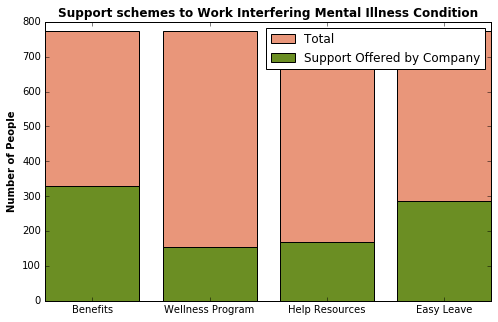

In [29]:
#filter for mental illness with need of support
need = ment[(ment["work_interfere"] == "Often")|(ment["work_interfere"] == "Rarely")|
           (ment["work_interfere"] == "Sometimes")]
tot = need["Timestamp"].count()

#filter for employees reporting support is provided in at least one of the following:
sup_ben = need[(need["benefits"] == "Yes")]["Timestamp"].count()
sup_well = need[(need["wellness_program"] == "Yes")]["Timestamp"].count()
sup_help = need[(need["seek_help"] == "Yes")]["Timestamp"].count()
sup_leave = need[(need["leave"] == "Somewhat easy")|(need["leave"] == "Very easy")]["Timestamp"].count()

#plot level of support VS total need for each form
fig = plt.figure(figsize=(8,5))
plt.bar(["Benefits","Wellness Program","Help Resources","Easy Leave"],[tot,tot,tot,tot],
          color="darksalmon",label='Total')
plt.bar(["Benefits","Wellness Program","Help Resources","Easy Leave"],
          [sup_ben,sup_well,sup_help,sup_leave],color="olivedrab",label='Support Offered by Company')

plt.ylabel('Number of People',fontweight="heavy")
plt.title("Support schemes to Work Interfering Mental Illness Condition",fontweight='heavy', size=12)
plt.legend()

plt.savefig("Support-schemes")

In [30]:
sup_ratios = [sup_ben/tot,sup_well/tot,sup_help/tot,sup_leave/tot]
for i in sup_ratios:
    print(i)

0.4243208279430789
0.20051746442432083
0.2186287192755498
0.36998706338939197


### MENTAL ILLENSS AT WORKPLACE - ARE EMPLOYEES WITH MENTAL ILLNESS ISSUES SUPPORTED BY COMPANY CULTURE?

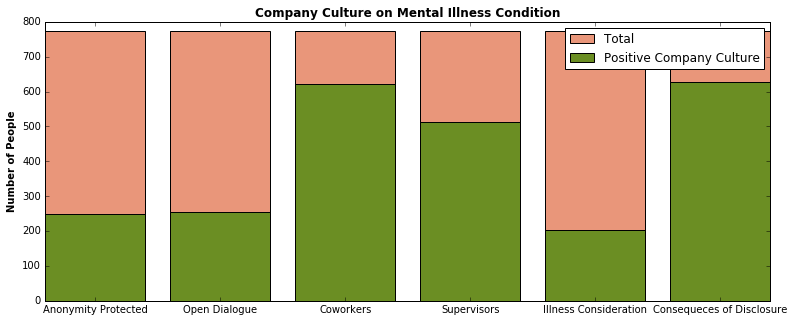

In [31]:
#filter for employees with mental health issues interfearing with 
#work activity who report positive company culture according to multiple criteria:
cult_anon = need[(need["anonymity"] == "Yes")]["Timestamp"].count()
cult_ment_cons = need[(need["mental_health_consequence"] == "No")]["Timestamp"].count()
cult_cow = need[(need["coworkers"] == "Yes")|(need["coworkers"] == "Some of them")]["Timestamp"].count()
cult_sup = need[(need["supervisor"] == "Yes")|(need["supervisor"] == "Some of them")]["Timestamp"].count()
cult_ment_phys = need[(need["mental_vs_physical"] == "Yes")]["Timestamp"].count()
cult_obs_cons = need[(need["obs_consequence"] == "No")]["Timestamp"].count()


#plot positive culture VS total for each criteria
fig = plt.figure(figsize=(13,5))
plt.bar(["Anonymity Protected","Open Dialogue","Coworkers",
         "Supervisors","Illness Consideration","Consequeces of Disclosure"],
        [tot,tot,tot,tot,tot,tot],color="darksalmon",label='Total')
plt.bar(["Anonymity Protected","Open Dialogue","Coworkers",
         "Supervisors","Illness Consideration","Consequeces of Disclosure"],
        [cult_anon,cult_ment_cons,cult_cow,cult_sup,cult_ment_phys,cult_obs_cons],
        color="olivedrab",label='Positive Company Culture')

plt.ylabel('Number of People',fontweight="heavy")
plt.title("Company Culture on Mental Illness Condition",fontweight='heavy', size=12)
plt.legend()

plt.savefig("Positive-Culture")

In [32]:
cult_ratios = [cult_anon/tot,cult_ment_cons/tot,cult_cow/tot,cult_sup/tot,
               cult_ment_phys/tot,cult_obs_cons/tot]
for i in cult_ratios:
    print(i)

0.3221216041397154
0.3311772315653299
0.8033635187580854
0.6649417852522639
0.26390685640362227
0.8098318240620958
